Methods of Machine Learning and Intellectual Analysis of Data (Learning course) \
Bohdan Pavlyshenko (https://www.linkedin.com/in/bpavlyshenko/) \
Youtube video: https://www.youtube.com/watch?v=vl83TlOBcnU&list=PLMQt7tnruMvF1jetHNUKjMtHKSp78H2bb&index=11

# House Prices

Used resources:\
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

In [52]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix, hstack
import xgboost as xgb
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [53]:
df=pd.read_csv('data/house_price.csv')

In [54]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [55]:
df['logSalePrice']=np.log1p(df['SalePrice'])

In [56]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,logSalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12.429220


In [58]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [60]:
num_features=[]
cat_features=[]
exclude_cols=['Id','SalePrice','logSalePrice']
for i in df.dtypes.index:
    if (i not in exclude_cols):
        if(df.dtypes[i]=='object'):
            cat_features.append(i)
        else:
            num_features.append(i) 

In [61]:
num_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [62]:
cat_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [63]:
target='logSalePrice'

In [64]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,logSalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,12.024057
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,0.399449
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,10.460271
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,11.775105
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,12.001512
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,12.273736
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,13.534474


In [66]:
df.describe(include = 'object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


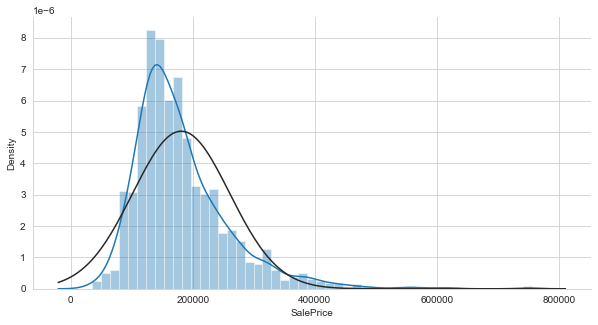

In [68]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(df['SalePrice'],ax=ax, fit=norm)   
sns.despine()

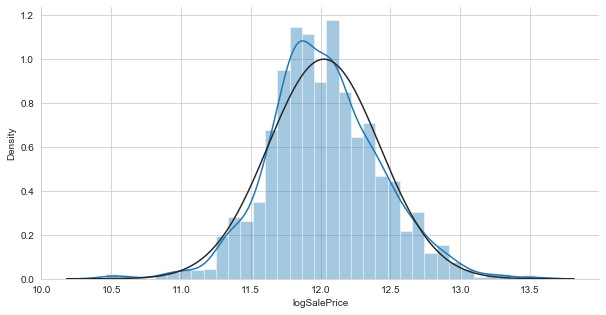

In [69]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(df['logSalePrice'],ax=ax, fit=norm)   
sns.despine()

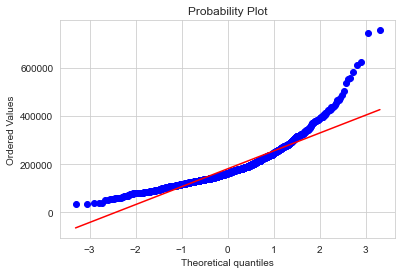

In [70]:
_=stats.probplot(df['SalePrice'], plot=plt, dist='norm')

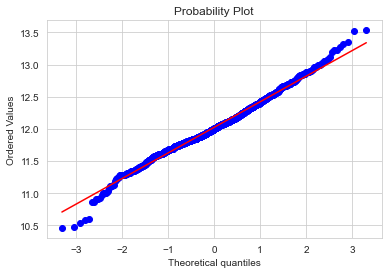

In [71]:
_=stats.probplot(df['logSalePrice'], plot=plt, dist='norm')

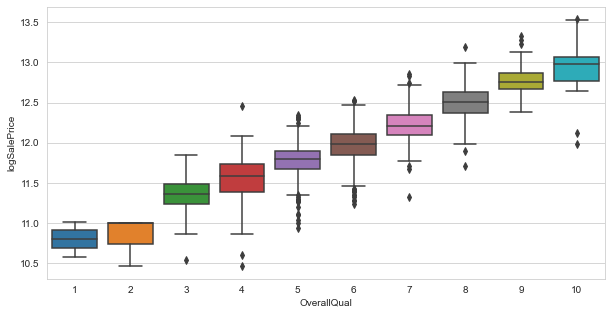

In [73]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x='OverallQual', y="logSalePrice", data=df,ax=ax)

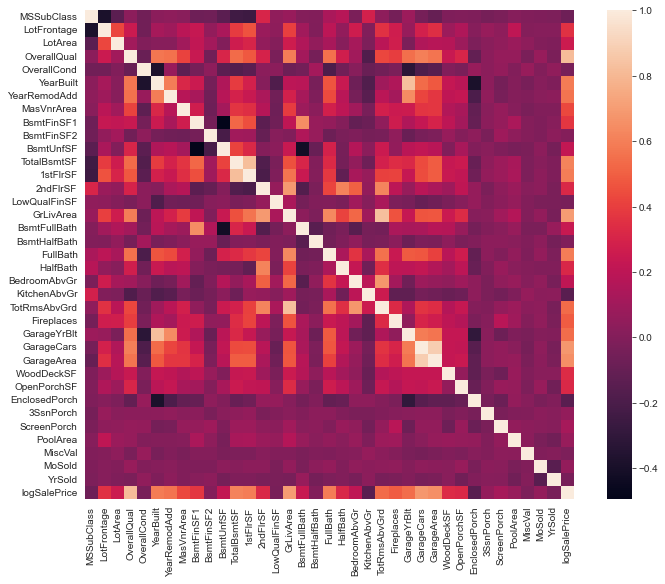

In [74]:
corrmat = df[num_features+[target]].corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

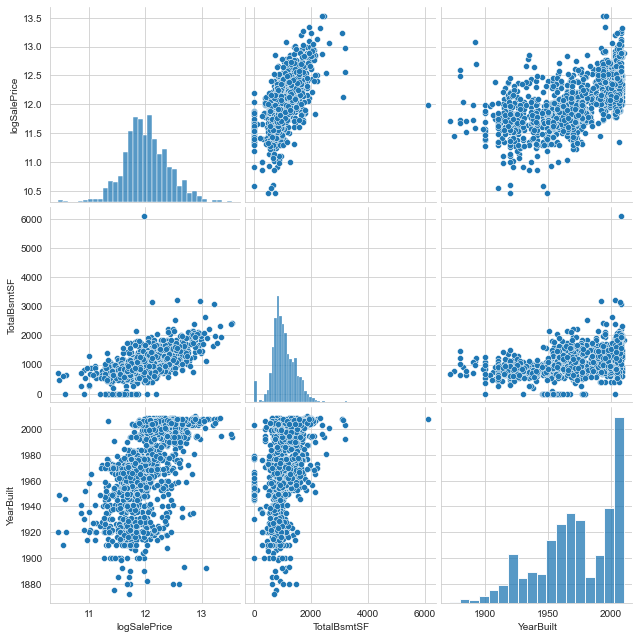

In [75]:
cols = ['logSalePrice',   'TotalBsmtSF',  'YearBuilt']
sns.pairplot(df[cols], size = 3)
plt.show();

In [76]:
cat_features_enc=[]
for i in cat_features:
    feature_enc=i+'_enc'
    cat_features_enc.append(feature_enc)
    le = LabelEncoder()
    df[feature_enc] = le.fit_transform(df[i])

In [77]:
cat_features_enc

['MSZoning_enc',
 'Street_enc',
 'Alley_enc',
 'LotShape_enc',
 'LandContour_enc',
 'Utilities_enc',
 'LotConfig_enc',
 'LandSlope_enc',
 'Neighborhood_enc',
 'Condition1_enc',
 'Condition2_enc',
 'BldgType_enc',
 'HouseStyle_enc',
 'RoofStyle_enc',
 'RoofMatl_enc',
 'Exterior1st_enc',
 'Exterior2nd_enc',
 'MasVnrType_enc',
 'ExterQual_enc',
 'ExterCond_enc',
 'Foundation_enc',
 'BsmtQual_enc',
 'BsmtCond_enc',
 'BsmtExposure_enc',
 'BsmtFinType1_enc',
 'BsmtFinType2_enc',
 'Heating_enc',
 'HeatingQC_enc',
 'CentralAir_enc',
 'Electrical_enc',
 'KitchenQual_enc',
 'Functional_enc',
 'FireplaceQu_enc',
 'GarageType_enc',
 'GarageFinish_enc',
 'GarageQual_enc',
 'GarageCond_enc',
 'PavedDrive_enc',
 'PoolQC_enc',
 'Fence_enc',
 'MiscFeature_enc',
 'SaleType_enc',
 'SaleCondition_enc']

In [78]:
features = num_features + cat_features_enc

In [79]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=10)

In [80]:
X_train = train_df[features].values
X_test = test_df[features].values
y_train = train_df[target].values
y_test = test_df[target].values

In [81]:
lightgbm_params = {
        'boosting_type': 'gbdt',
        'metric': 'rmse',
        'objective': 'regression',
        'n_jobs': -1,
        'seed': 15,
        'num_leaves': 500,  
        'max_depth': 5,  
        'learning_rate': 0.01,
        'bagging_fraction': 0.5, 
        'colsample_bytree': 0.5}
regr=LGBMRegressor(**lightgbm_params, n_estimators=1000)

_=regr.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test,y_test)], verbose=10)
test_df['pred1'] = regr.predict(X_test)

[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[10]	training's rmse: 0.365142	valid_1's rmse: 0.381172
[20]	training's rmse: 0.338281	valid_1's rmse: 0.355753
[30]	training's rmse: 0.31421	valid_1's rmse: 0.333546
[40]	training's rmse: 0.292256	valid_1's rmse: 0.313146
[50]	training's rmse: 0.272142	valid_1's rmse: 0.294962
[60]	training's rmse: 0.253842	valid_1's rmse: 0.278234
[70]	training's rmse: 0.237332	valid_1's rmse: 0.262982
[80]	training's rmse: 0.222687	valid_1's rmse: 0.249771
[90]	training's rmse: 0.209245	valid_1's rmse: 0.237544
[100]	training's rmse: 0.197408	valid_1's rmse: 0.227087
[110]	training's rmse: 0.186623	valid_1's rmse: 0.217747
[120]	training's rmse: 0.17682	valid_1's rmse: 0.209509
[130]	training's rmse: 0.168047	valid_1's rmse: 0.202035
[140]	training's rmse: 0.160186	valid_1's rmse: 0.19544
[150]	training's rmse: 0.152982	valid_1's rmse: 0.189343
[160]	training's rmse: 0.146733	valid_1'

In [82]:
kf = KFold(n_splits=5, shuffle=True, random_state=10)
pred=np.zeros(X_train.shape[0])
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    print (f'\nFold {i}')
    regr=LGBMRegressor(**lightgbm_params, n_estimators=1000)
    regr.fit(X_train[train_index,:], y_train[train_index], 
    eval_set = [(X_train[train_index,:], y_train[train_index]), 
              (X_train[test_index,:],y_train[test_index])], verbose=300)
    pred[test_index]= regr.predict(X_train[test_index,:])
train_df['cross_val_pred']=pred
rmse=np.round(mean_squared_error(train_df[target], train_df['cross_val_pred'], squared=False),3)
print(f'RMSE={rmse}')


Fold 0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[300]	valid_0's rmse: 0.104537	valid_1's rmse: 0.122115
[600]	valid_0's rmse: 0.0797574	valid_1's rmse: 0.109923
[900]	valid_0's rmse: 0.0710045	valid_1's rmse: 0.108564

Fold 1
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[300]	valid_0's rmse: 0.102743	valid_1's rmse: 0.147406
[600]	valid_0's rmse: 0.0779248	valid_1's rmse: 0.132428
[900]	valid_0's rmse: 0.0694346	valid_1's rmse: 0.130901

Fold 2
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[300]	valid_0's rmse: 0.101796	valid_1's rmse: 0.132994
[600]	valid_0's rmse: 0.0767207	valid_1's rmse: 0.124944
[900]	valid_0's rmse: 0.0684046	valid_1's rmse: 0.125072

Fold 3
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fra

In [83]:
regr=LGBMRegressor(**lightgbm_params, n_estimators=1000)
train_df['cross_val_pred']=cross_val_predict(regr, X_train, y_train, cv=5, n_jobs=-1)
rmse=np.round(mean_squared_error(train_df[target], train_df['cross_val_pred'], squared=False),3)
rmse

0.131

In [84]:
lightgbm_params ={'par1': {
        'boosting_type': 'gbdt',
        'metric': 'rmse',
        'objective': 'regression',
        'n_jobs': -1,
        'seed': 15,
        'num_leaves': 300,  
        'max_depth': 3,  
        'learning_rate': 0.01,
        'bagging_fraction': 0.5, 
        'colsample_bytree': 0.5,
        'n_estimators':100},
                  
        'par2': {
        'boosting_type': 'gbdt',
        'metric': 'rmse',
        'objective': 'regression',
        'n_jobs': -1,
        'seed': 15,
        'num_leaves': 700,  
        'max_depth': 10,  
        'learning_rate': 0.01,
        'bagging_fraction': 0.95, 
        'colsample_bytree': 0.95,
        'n_estimators':100},
                  
        'par3': {
        'boosting_type': 'gbdt',
        'metric': 'rmse',
        'objective': 'regression',
        'n_jobs': -1,
        'seed': 15,
        'num_leaves': 50,  
        'max_depth': 5,  
        'learning_rate': 0.01,
        'bagging_fraction': 0.5, 
        'colsample_bytree': 0.5,
        'n_estimators':100}
                 }


In [85]:
for i in lightgbm_params.keys():
    regr = LGBMRegressor(**lightgbm_params[i])
    train_df['val_pred_'+i] = cross_val_predict(regr, X_train, y_train, cv=5, n_jobs=-1)
    cross_val_rmse = np.round(mean_squared_error(train_df[target].values, 
                        train_df['val_pred_'+i].values, squared=False),5)
    print(f'Model: {i}, Cross validation RMSE: {cross_val_rmse}')

Model: par1, Cross validation RMSE: 0.2343
Model: par2, Cross validation RMSE: 0.2133
Model: par3, Cross validation RMSE: 0.21709


In [88]:
for i in lightgbm_params.keys():
    print(i)   
    regr = LGBMRegressor(**lightgbm_params[i])
    regr.fit(X_train, y_train)
    test_df['pred_'+i] = regr.predict(X_test)
    test_rmse = np.round(mean_squared_error(test_df[target].values, 
                        test_df['pred_'+i].values, squared=False),5)
    print(f'Model: {i}, Cross validation RMSE: {test_rmse}')

par1
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
Model: par1, Cross validation RMSE: 0.24566
par2
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
Model: par2, Cross validation RMSE: 0.22137
par3
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
Model: par3, Cross validation RMSE: 0.22709


In [90]:
stack_val_vars=['val_pred_'+i for i in lightgbm_params.keys()]
stack_test_vars=['pred_'+i for i in lightgbm_params.keys()]
stack_val_vars, stack_test_vars

(['val_pred_par1', 'val_pred_par2', 'val_pred_par3'],
 ['pred_par1', 'pred_par2', 'pred_par3'])

In [91]:
stack_regr=LinearRegression()
_=stack_regr.fit(train_df[stack_val_vars].values,y_train)
train_df['stacking']=stack_regr.predict(train_df[stack_val_vars].values)
stacking_val_rmse = np.round(mean_squared_error(train_df[target].values, 
                        train_df['stacking'].values, squared=False),5)
test_df['stacking'] = stack_regr.predict(test_df[stack_test_vars].values)
stacking_test_rmse = np.round(mean_squared_error(test_df[target].values, 
                        test_df['stacking'].values, squared=False),5)
stacking_val_rmse, stacking_test_rmse

(0.14604, 0.14829)